In [141]:
% matplotlib inline
import numpy as np
import pylab
import mahotas as mh
from skimage import *

http://pythonvision.org/basic-tutorial/

In [139]:
dna = mh.imread('testimg.jpeg')

In [140]:
dna.shape

(1024, 1344, 1)

In [25]:
dna_3d = dna.copy
dna = dna[:,:,0]

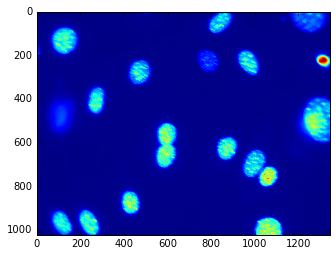

In [26]:
pylab.imshow(dna)

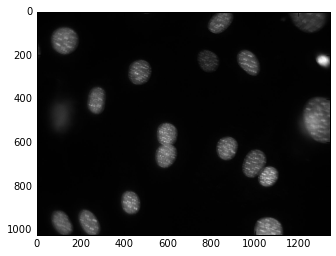

In [29]:
pylab.gray()
pylab.imshow(dna)

In [30]:
thresh = mh.thresholding.otsu(dna)

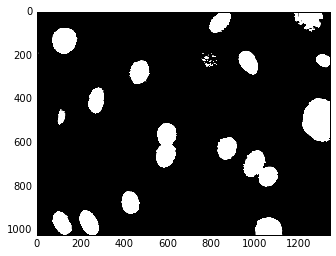

In [32]:
pylab.imshow(dna>thresh)

In [33]:
labeled, nrobjects = mh.label(dna>thresh)

In [34]:
print nrobjects

39


<type 'numpy.ndarray'>
uint8


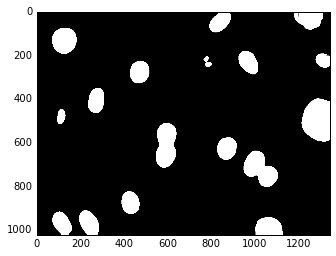

In [53]:
dnasmooth = mh.gaussian_filter(dna,8)
#smooththresh = mh.thresholding.otsu(dnasmooth)
fuggu = dnasmooth.astype('uint8')
pylab.imshow(fuggu)
print type(fuggu)
print fuggu.dtype
#pylab.imshow(dnasmooth)
T = mh.thresholding.otsu(fuggu)
pylab.imshow(dnasmooth>T)

In [57]:
labeled, nrobjects = mh.label(dnasmooth>T)

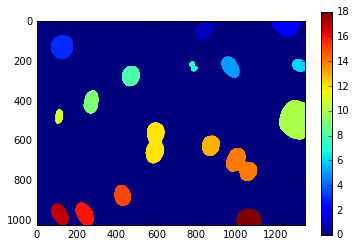

In [61]:
pylab.jet()
pylab.imshow(labeled)
pylab.colorbar()

Second Task: Segmenting the Image
The previous result was acceptable for a first pass, but there were still nuclei glued together. Let’s try to do better.

Here is a simple, traditional, idea:

smooth the image

find regional maxima

Use the regional maxima as seeds for watershed

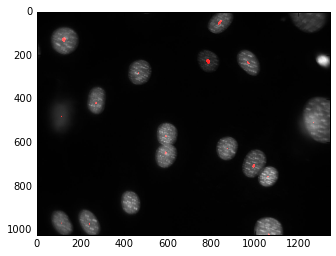

In [103]:
dnasmooth = mh.gaussian_filter(dna,16).astype('uint8')
rmax = mh.regmax(dnasmooth)
pylab.imshow(mh.overlay(dna,rmax))

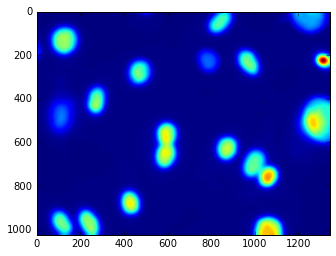

In [87]:
pylab.imshow(dnasmooth)

In [90]:
?mh.regmax

In [93]:
seeds,nr_nuclei = mh.label(rmax)
print nr_nuclei

22


In [94]:
?mh.distance

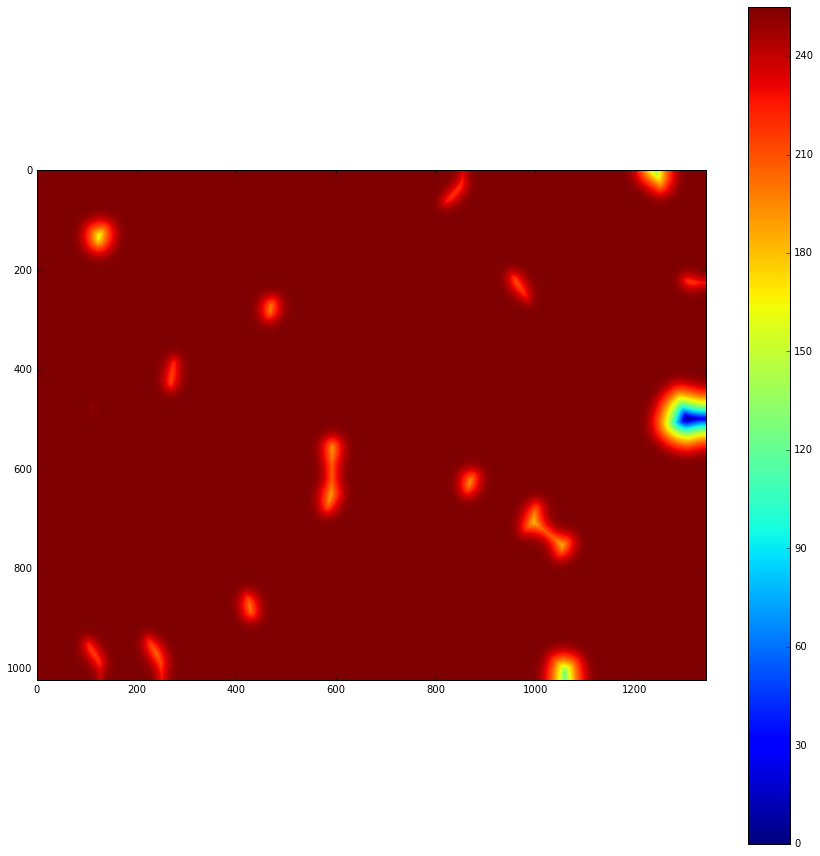

In [121]:
dist = mh.distance(dnasmooth>T)
dist = dist.max() - dist
dist -= dist.min()
dist  = dist/float(dist.ptp()) * 255
dist = dist.astype(np.uint8)
pylab.figure(figsize=(15,15))
pylab.imshow(dist)
pylab.colorbar()

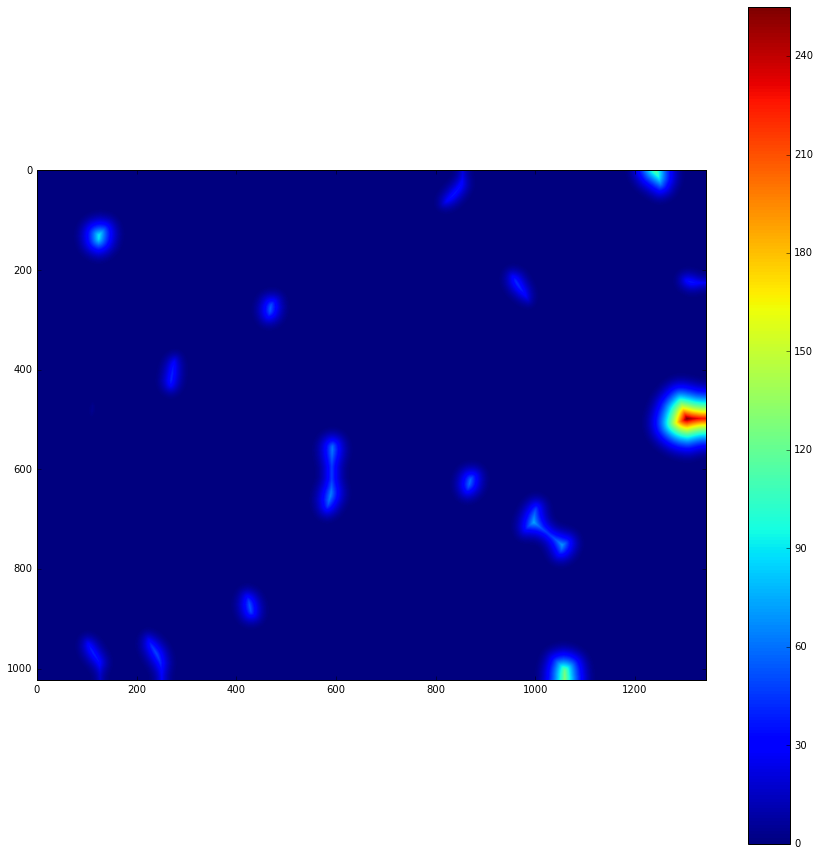

In [120]:
pylab.figure(figsize=(15,15))
pylab.imshow(dist)
pylab.colorbar()

In [ ]:
seeds,nr_nuclei = mh.label(rmax)


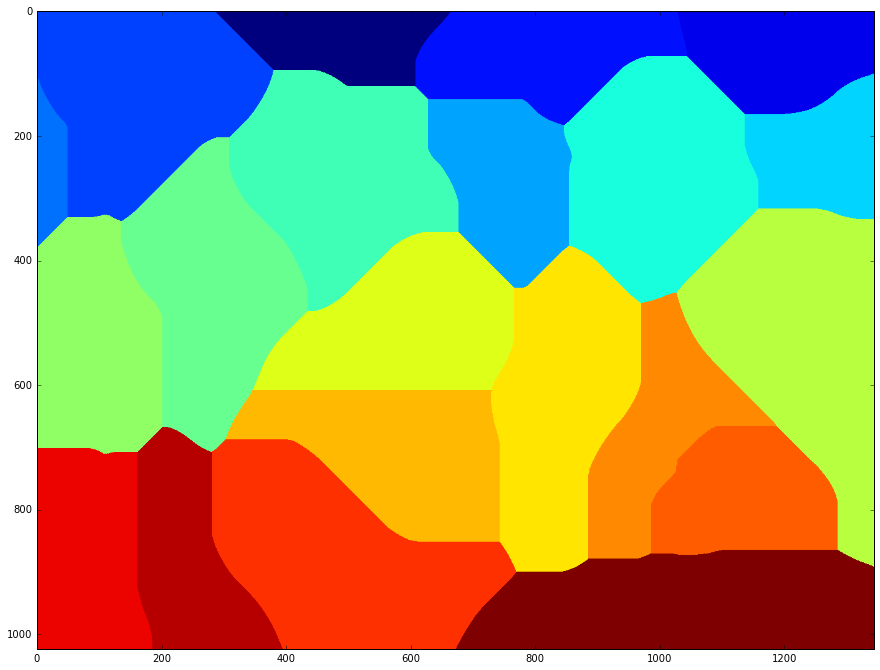

In [118]:
pylab.figure(figsize=(15,15))
nuclei = mh.cwatershed(dist, seeds)
pylab.imshow(nuclei)

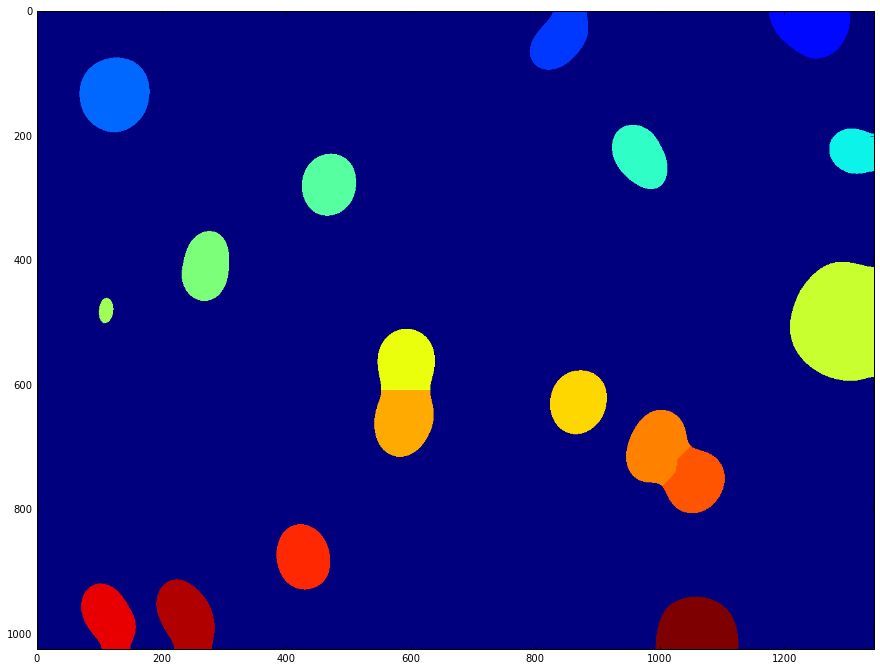

In [123]:
pylab.figure(figsize=(15,15))
pylab.imshow(nuclei*(dnasmooth>T))

[ 2  3  4  5  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]


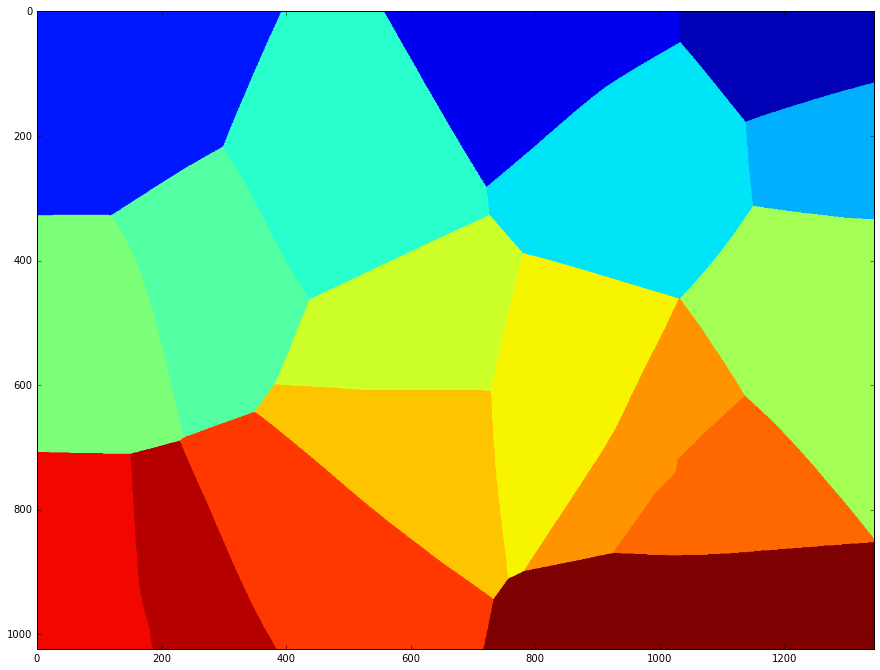

In [137]:
pylab.figure(figsize=(15,15))
whole = mh.segmentation.gvoronoi(nuclei*(dnasmooth>T))
print np.unique(whole)
pylab.imshow(whole)

In [ ]:
nuclei = nuclei*(dnasmooth>T)

[ 0  2  3  4  8 13 20 21 22]


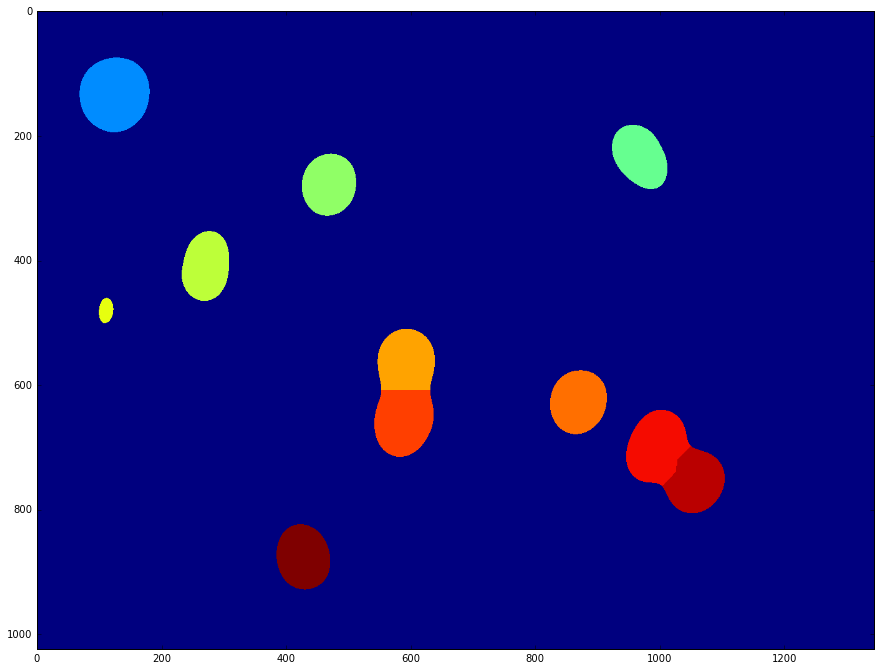

In [136]:
pylab.figure(figsize=(15,15))
borders = np.zeros(nuclei.shape,np.bool)
borders[0,:] = 1
borders[-1,:] = 1
borders[:,0] = 1
borders[:,-1] = 1
at_border = np.unique(nuclei[borders])
print at_border
for obj in at_border:
    whole[whole==obj] = 0
pylab.imshow(whole*(dnasmooth>T))

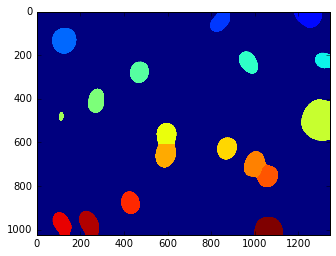

In [129]:
pylab.imshow(nuclei*(dnasmooth>T))